<a href="https://colab.research.google.com/github/venkateshblks/Clustering/blob/main/crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.**

Data Description:
Murder -- Muder rates in different places of United States  
Assualt- Assualt rate in different places of United States  
UrbanPop - urban population in different places of United States  
Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data1=data.iloc[:,1:]
data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# Hierarchical clustering

In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler().fit_transform(data1)
scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [8]:
len(scaler)

50

In [9]:
# create dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

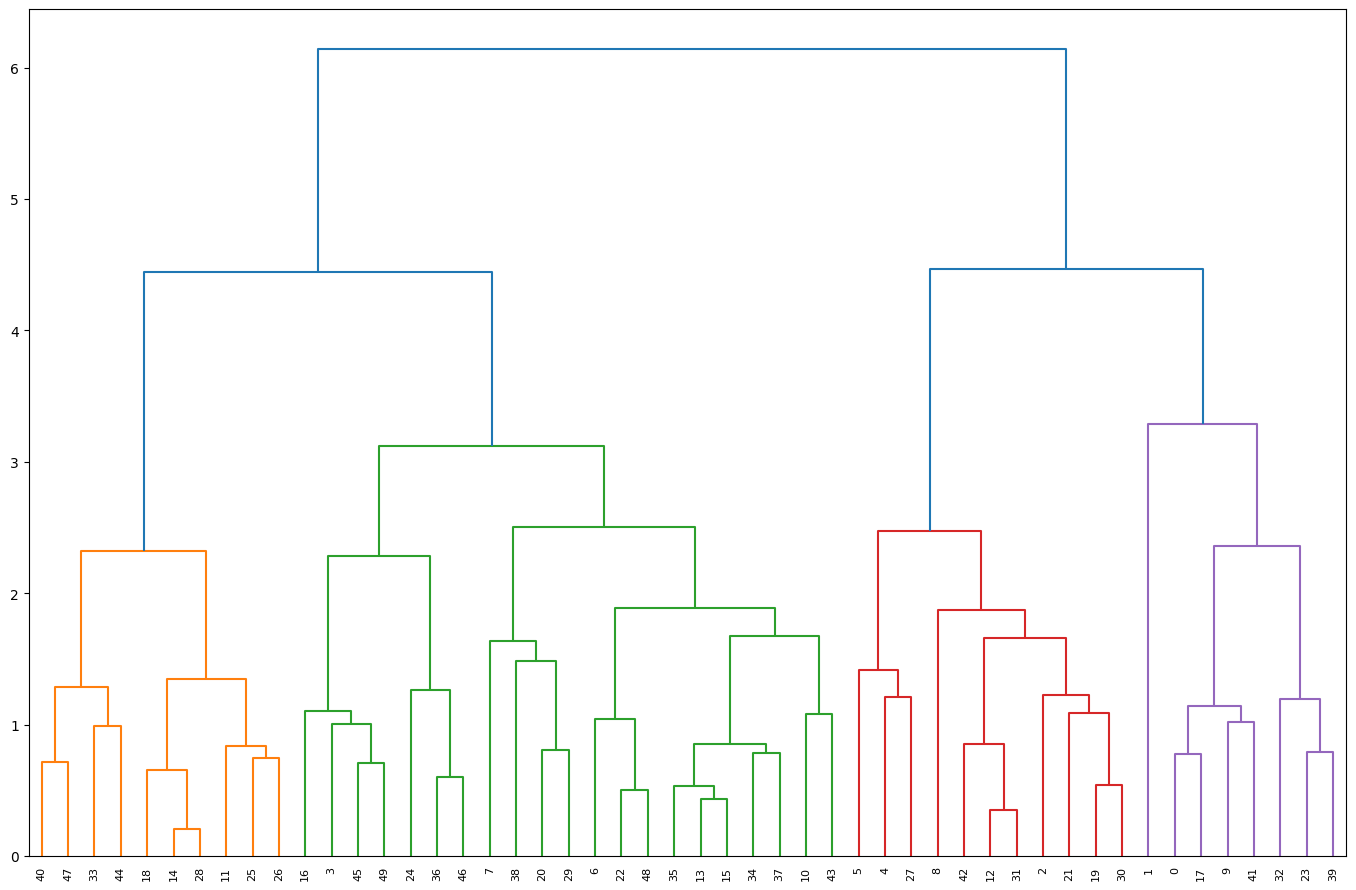

In [10]:
plt.figure(figsize = (17, 11))
dendrogram=sch.dendrogram(sch.linkage(scaler, method='complete'))

In [11]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [12]:
y_hc = hc.fit_predict(data1)
y_hc

array([1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [13]:
hc.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [14]:
data['h_clusterid'] = hc.labels_

In [15]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


In [16]:
data.h_clusterid.value_counts()

0    20
1    14
2    14
3     2
Name: h_clusterid, dtype: int64

In [17]:
data.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
18,Maine,2.1,83,51,7.8,0
40,South Dakota,3.8,86,45,12.8,0
34,Ohio,7.3,120,75,21.4,0
33,North Dakota,0.8,45,44,7.3,0
28,New Hampshire,2.1,57,56,9.5,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
22,Minnesota,2.7,72,66,14.9,0
43,Utah,3.2,120,80,22.9,0


In [18]:
data[data.h_clusterid==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
8,Florida,15.4,335,80,31.9,3
32,North Carolina,13.0,337,45,16.1,3


In [19]:
data.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.471429,263.500000,69.142857,29.000000
2,8.214286,173.285714,70.642857,22.842857
3,14.200000,336.000000,62.500000,24.000000


# K-means

In [20]:
data2=data.drop(columns='h_clusterid')
data2=data2.iloc[:,1:]
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [21]:
from sklearn.cluster import KMeans

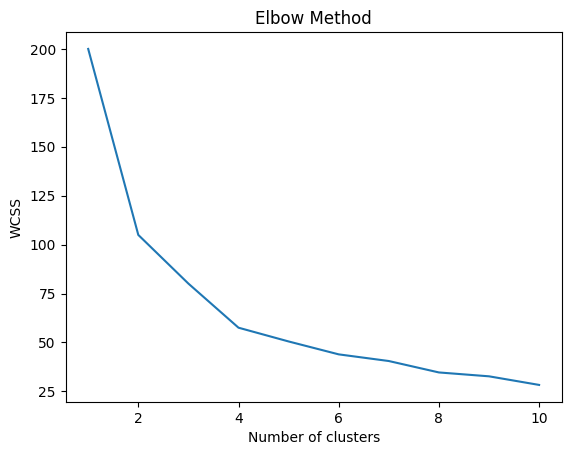

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

In [24]:
clusters = KMeans(2, random_state=42)
clusters.fit(scaler)
clusters.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
clusters.fit_predict(scaler)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
clusters.inertia_

104.96163315756871

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(data2, clusters.labels_)

0.5406742439027667

In [28]:
c2=KMeans(4, random_state=41)
c2.fit(scaler)


KMeans(n_clusters=4, random_state=41)

In [29]:
silhouette_score(data2, c2.labels_)

0.21131210053881153

In [30]:
data2['clusterid']=clusters.labels_
data2['new_clusterid']=c2.labels_
data2

,Murder,Assault,UrbanPop,Rape,clusterid,new_clusterid
0,13.2,236,58,21.2,1,3
1,10.0,263,48,44.5,1,2
2,8.1,294,80,31.0,1,2
3,8.8,190,50,19.5,0,3
4,9.0,276,91,40.6,1,2
5,7.9,204,78,38.7,1,2
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,1,2
9,17.4,211,60,25.8,1,3


In [31]:
data2['clusterid'].value_counts()

0    30
1    20
Name: clusterid, dtype: int64

In [32]:
data2.groupby('clusterid').mean()

,Murder,Assault,UrbanPop,Rape,new_clusterid
clusterid,,,,,
0,4.870,114.433333,63.633333,15.943333,0.533333
1,12.165,255.250000,68.400000,29.165000,2.350000


In [33]:
data2['new_clusterid'].value_counts()

0    16
2    13
1    13
3     8
Name: new_clusterid, dtype: int64

In [34]:
data2.groupby('new_clusterid').mean()

,Murder,Assault,UrbanPop,Rape,clusterid
new_clusterid,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.000
1,3.600000,78.538462,52.076923,12.176923,0.000
2,10.815385,257.384615,76.000000,33.192308,1.000
3,13.937500,243.625000,53.750000,21.412500,0.875


#DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
data3=data.drop(columns='h_clusterid')
data3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [56]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(scaler)
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [57]:
data3['clusterId']=dbscan.labels_
data3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterId
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [58]:
data3['clusterId'].value_counts()

 1    28
-1    10
 0     6
 2     3
 3     3
Name: clusterId, dtype: int64

In [59]:
data3.groupby('clusterId').mean()

,Murder,Assault,UrbanPop,Rape
clusterId,,,,
-1,9.560,243.500000,70.800000,30.430000
0,14.950,237.000000,55.833333,22.616667
1,4.825,112.035714,63.357143,16.107143
2,11.400,234.666667,83.000000,25.200000
3,11.600,280.000000,70.333333,31.666667
